### Willl Dodge 2018-03-01

In [9]:
library(data.table)
library(ggplot2)
library(lubridate)

In [10]:
filename <- 'C:\\Users\\dodge\\OneDrive\\Documents\\test_met_data.csv'

In [11]:
DT <- fread(filename)

In [12]:
DT[, date.time := parse_date_time(date.time, 'YmdHMS')]

In [13]:
DT_temp <- DT[, .(airtemp.2m.C, soiltemp.4inch.C, soiltemp.8inch.C, date.time)]

In [14]:
DT_day <- DT_temp[, lapply(.SD, mean), by = (date.time = floor_date(date.time, "24 hours"))]

In [15]:
DT_hour <- DT_temp[, lapply(.SD, mean), by = (date.time = floor_date(date.time, "60 min"))]

In [16]:
DT_15_min <- DT_temp[, lapply(.SD, mean), by=(date.time = floor_date(date.time, "15 min"))]

In [17]:
DT_day[1:5]

date.time,airtemp.2m.C,soiltemp.4inch.C,soiltemp.8inch.C
1,0.6686902,3.684460,4.447056
2,1.4850105,3.926031,4.483805
3,3.6130033,4.346593,4.835060
4,8.3530268,5.782227,5.780140
5,7.9855135,6.519039,6.642173


In [18]:
DT_hour[1:5]

date.time,airtemp.2m.C,soiltemp.4inch.C,soiltemp.8inch.C
2007-01-01 00:00:00,-1.645200,3.671460,4.832120
2007-01-01 01:00:00,-1.423433,3.570558,4.762842
2007-01-01 02:00:00,-2.161742,3.441542,4.665967
2007-01-01 03:00:00,-2.846267,3.323625,4.569125
2007-01-01 04:00:00,-3.477133,3.215500,4.476267


In [19]:
DT_15_min[1:5]

date.time,airtemp.2m.C,soiltemp.4inch.C,soiltemp.8inch.C
2007-01-01 00:00:00,-1.686300,3.690550,4.844850
2007-01-01 00:15:00,-1.617800,3.658733,4.823633
2007-01-01 00:30:00,-1.321167,3.622100,4.799833
2007-01-01 00:45:00,-1.503900,3.586933,4.774033
2007-01-01 01:00:00,-1.223067,3.552233,4.749300


In [20]:
p1 <- ggplot(DT_15_min)+
geom_line(aes(x=date.time, y=airtemp.2m.C))

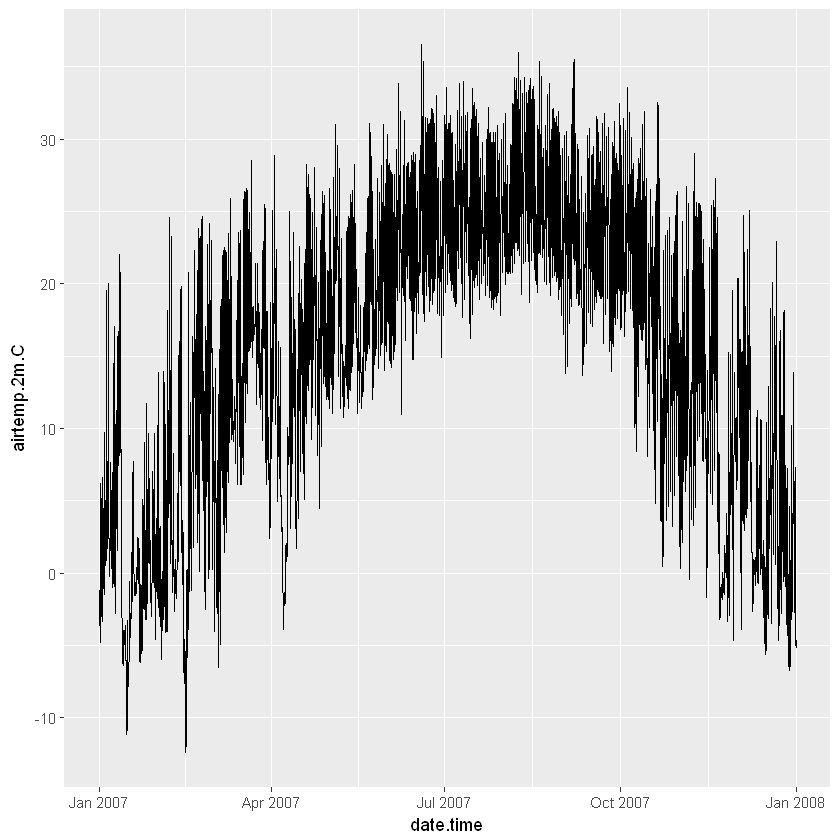

In [21]:
p1

In [22]:
p2 <- ggplot(DT_hour)+
geom_line(aes(x=date.time, y=airtemp.2m.C))

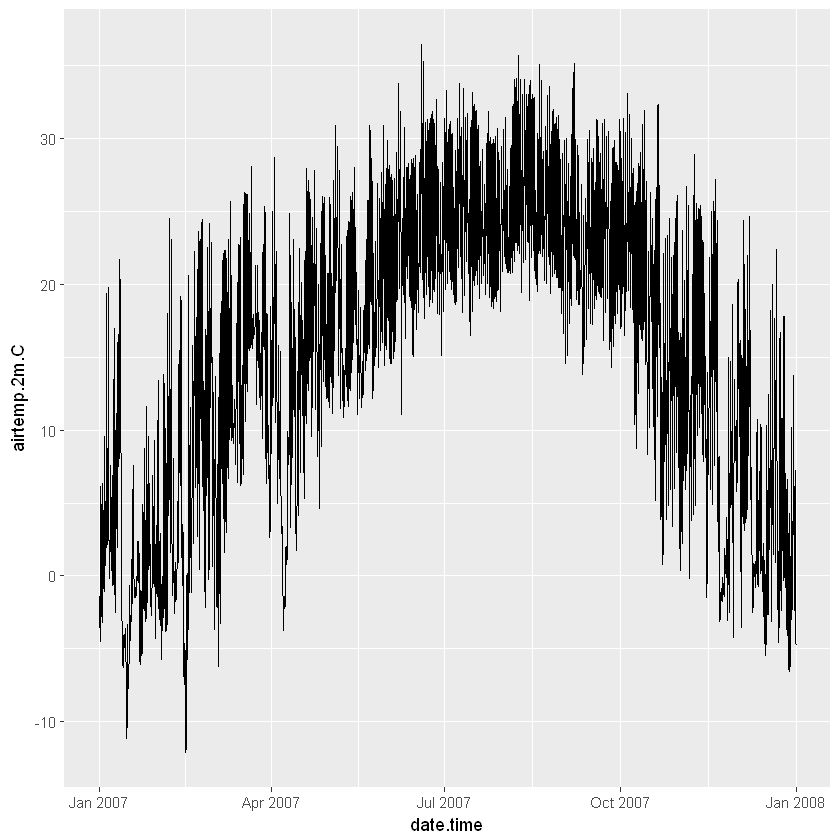

In [23]:
p2

In [24]:
p3 <- ggplot(DT_day)+
geom_line(aes(x=date.time, y=airtemp.2m.C))

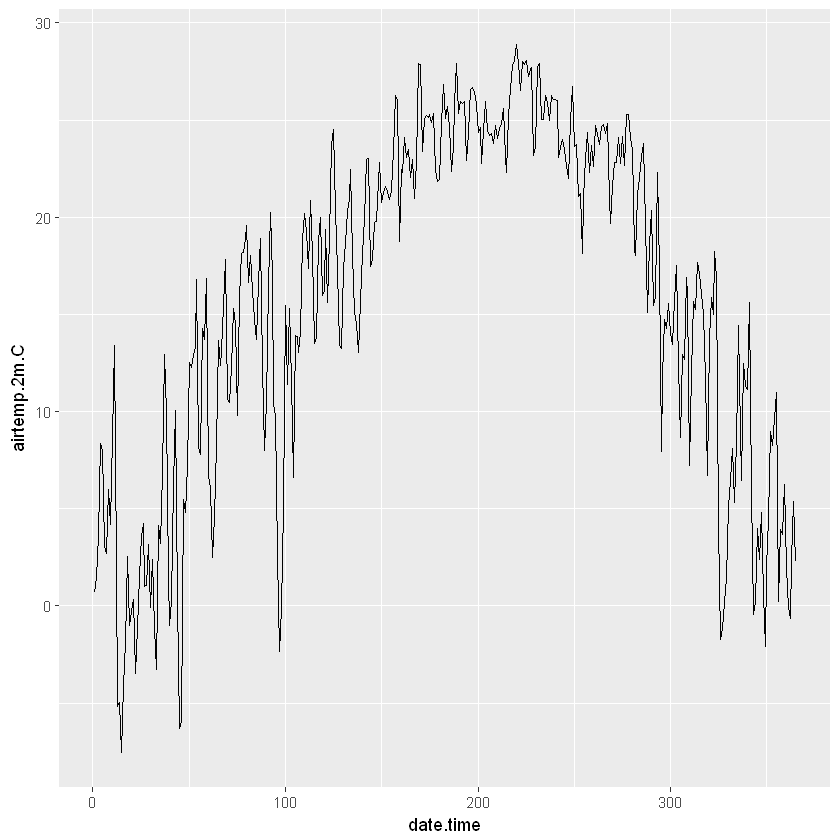

In [25]:
p3